Cornell Box Scene Visualizer (code generated by ChatGPT)

Import plot and array packages

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np



Create short block vertices and triangle indices

In [3]:
# Short block mesh vertices
short_block_points = np.array([
    [130.0, 165.0, 65.0],
    [82.0, 165.0, 225.0],
    [240.0, 165.0, 272.0],
    [290.0, 165.0, 114.0],
    [290.0, 0.0, 114.0],
    [290.0, 165.0, 114.0],
    [240.0, 165.0, 272.0],
    [240.0, 0.0, 272.0],
    [130.0, 0.0, 65.0],
    [130.0, 165.0, 65.0],
    [290.0, 165.0, 114.0],
    [290.0, 0.0, 114.0],
    [82.0, 0.0, 225.0],
    [82.0, 165.0, 225.0],
    [130.0, 165.0, 65.0],
    [130.0, 0.0, 65.0],
    [240.0, 0.0, 272.0],
    [240.0, 165.0, 272.0],
    [82.0, 165.0, 225.0],
    [82.0, 0.0, 225.0]
])

# Short block triangle indices
short_block_indices = [
    [3, 2, 0], [2, 1, 0],
    [7, 6, 4], [6, 5, 4],
    [11, 10, 8], [10, 9, 8],
    [15, 14, 12], [14, 13, 12],
    [19, 18, 16], [18, 17, 16]
]

Create tall block vertices and triangle indices

In [4]:
# Tall block mesh vertices
tall_block_points = np.array([
    [423.0, 330.0, 247.0],
    [265.0, 330.0, 296.0],
    [314.0, 330.0, 456.0],
    [472.0, 330.0, 406.0],
    [423.0, 0.0, 247.0],
    [423.0, 330.0, 247.0],
    [472.0, 330.0, 406.0],
    [472.0, 0.0, 406.0],
    [472.0, 0.0, 406.0],
    [472.0, 330.0, 406.0],
    [314.0, 330.0, 456.0],
    [314.0, 0.0, 456.0],
    [314.0, 0.0, 456.0],
    [314.0, 330.0, 456.0],
    [265.0, 330.0, 296.0],
    [265.0, 0.0, 296.0],
    [265.0, 0.0, 296.0],
    [265.0, 330.0, 296.0],
    [423.0, 330.0, 247.0],
    [423.0, 0.0, 247.0]
])

# Tall block triangle indices
tall_block_indices = [
    [3, 2, 0], [2, 1, 0],
    [7, 6, 4], [6, 5, 4],
    [11, 10, 8], [10, 9, 8],
    [15, 14, 12], [14, 13, 12],
    [19, 18, 16], [18, 17, 16]
]

Create light source

In [5]:
# Light source triangles
light_points = np.array([
    [343.0, 548.7, 227.0],
    [343.0, 548.7, 332.0],
    [213.0, 548.7, 332.0],
    [213.0, 548.7, 227.0]
])

light_triangles = [
    [light_points[0], light_points[1], light_points[2]],
    [light_points[2], light_points[3], light_points[0]]
]

Create camera

In [6]:
# Camera position and look-at
camera_pos = np.array([278, 273, -800])
camera_look_at = np.array([278, 273, 0])

Plot the scene

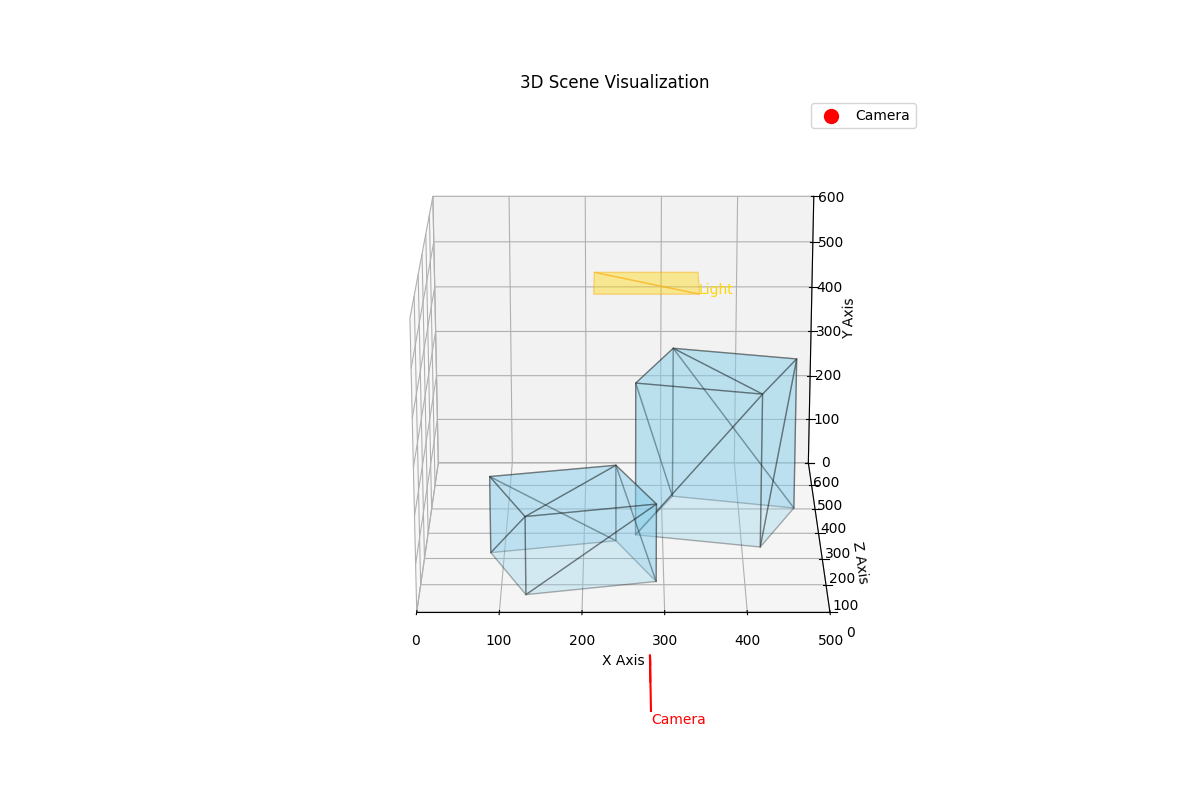

In [7]:
# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Scene Visualization")

# Plot the short block triangles
for tri_indices in short_block_indices:
    triangle = short_block_points[tri_indices][:, [0, 2, 1]]  # Swap Y and Z
    tri = Poly3DCollection([triangle], alpha=0.3, edgecolor='black')
    tri.set_facecolor('skyblue')
    ax.add_collection3d(tri)

# Plot the tall block triangles
for tri_indices in tall_block_indices:
    triangle = tall_block_points[tri_indices][:, [0, 2, 1]]  # Swap Y and Z
    tri = Poly3DCollection([triangle], alpha=0.3, edgecolor='black')
    tri.set_facecolor('skyblue')
    ax.add_collection3d(tri)

# Plot light source triangles
for light_triangle in light_triangles:
    triangle = np.array(light_triangle)[:, [0, 2, 1]]  # Swap Y and Z
    tri = Poly3DCollection([triangle], alpha=0.4, edgecolor='orange')
    tri.set_facecolor('gold')
    ax.add_collection3d(tri)

# Plot the camera
camera_pos_swapped = camera_pos[[0, 2, 1]]
camera_look_at_swapped = camera_look_at[[0, 2, 1]]
ax.scatter(*camera_pos_swapped, color='red', s=100, label='Camera')
ax.quiver(*camera_pos_swapped, *(camera_look_at_swapped - camera_pos_swapped), color='red', length=200, normalize=True)

# Label points
ax.text(*camera_pos_swapped, "Camera", color='red')
ax.text(*light_points[0][[0, 2, 1]], "Light", color='gold')

# Set axis limits
ax.set_xlim([0, 500])
ax.set_ylim([0, 600])
ax.set_zlim([0, 600])

# Labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Z Axis")
ax.set_zlabel("Y Axis")

ax.view_init(20, -90)

plt.legend()
plt.show()